<a href="https://colab.research.google.com/github/Ruhit43/Python--Web-Scarping/blob/main/Python_Web_Scaring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the python packages

In [ ]:
import requests
import json
import pandas as pd
import http.client

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec

In [ ]:
all_results = []
filters = []

Importing all the data from the website
Website link- https://www.carstore.ie/

Price limit- (0 - 100,000)

In [ ]:
# Looping through all the pages
for page in range(1, 41):  # Assuming there are 40 pages
    conn = http.client.HTTPSConnection("www.carstore.ie")
    payload = ''
    headers = {
        'Cookie': 'PHPSESSID=975a4fb001e1d580900a475d913cd258; carstoreie_session=eyJpdiI6InJcL2hHN2wrN1ZPXC9zZ1dsSEMydXVmdz09IiwidmFsdWUiOiJVK3YwK2trRGdIS0RTWncxXC9SMkdCNTNNTTNZZFU5eVlJSmp2MFRENkNTU3BvRlZvcmE2Rm1nYWVCWnJITEpcLzZMZGNcL3NQSFRCRjlJK1krQ2ZiNE56TFhVRkxuc1lxS0kwaDNVeTg2VE1VWXJ0M2FHVituQld5YVR1M0pkUFpJcyIsIm1hYyI6ImJhOGNlZTdlNGJlYjcxMTE4MDg2ZjAwZTk4MGJlMTI5ZDY0YTlhYmMwYzVkZTlhOTM4MmRmMWFiNDhhYjMyYjEifQ%3D%3D; selected_currency=GBP'
    }
    conn.request("GET", f"/api/vehicle-search/?maxPrice=100000&page={page}", payload, headers)
    res = conn.getresponse()
    data = res.read()
    jdata = json.loads(data.decode("utf-8"))
    all_results.extend(jdata['results'])
    filters.extend(jdata['filters'])

# Creating a DataFrame from the concatenated results
df = pd.DataFrame(all_results)


Table of all the columns

In [ ]:
df

id external_id registration_number cap_id           make      model  \
0    7218    25546538              550030   None         Toyota       Aqua   
1    7220    25546717              023431   None         Toyota       Vitz   
2    7221    25546699              589965   None         Toyota       Aqua   
3    7223    25547011              303881   None          Mazda      Demio   
4    7248    25550863              106250   None          Honda      Grace   
..    ...         ...                 ...    ...            ...        ...   
909  7042    25528280            201CE574   None  Mercedes-Benz  CLS-Class   
910  6024    25460627           192D27280   None            BMW         X5   
911  7092    25532464             LP69BVV   None            BMW         X5   
912  7071    25530572           191D46165   None            BMW   7 Series   
913  7127    25535955            192C5291   None           Audi         Q7   

                                            derivative  model_year  \
0                                     1.5 VVT-i Hybrid        2017   
1                          1.5 Dual VVT-i 5Dr Luna M-D        2019   
2                                     1.5 VVT-i Hybrid        2017   
3                                1.3 EXCLUSIVE (FOCUS)        2017   
4    ** DEPOSIT TAKEN** 1.5 HYBRID 4 DR AUTO **REAR...        2017   
..                                                 ...         ...   
909                                 CLS 300 D AMG Line        2020   
910                                    xDrive45e xLine        2019   
911  X5 Xdrive45e M Sport Auto  xDrive45e M Sport  ...        2020   
912                    740 G11 D XDRIVE M SPORT 4DR AU        2019   
913                        50 TDI quattro Tiptronic SE        2019   

    registration_date  colour  ...  is_favourite is_sold  is_held  \
0          2055-07-01   White  ...         False   False    False   
1          2023-01-01   White  ...         False   False    False   
2          2058-07-01  Silver  ...         False   False    False   
3          2030-07-01  Silver  ...         False   False    False   
4          2010-07-01  Silver  ...         False   False    False   
..                ...     ...  ...           ...     ...      ...   
909        2020-01-01    Grey  ...         False   False    False   
910        2019-09-01   White  ...         False   False    False   
911        2019-09-01   Black  ...         False   False    False   
912        2019-01-01    Grey  ...         False   False    False   
913        2019-07-01    Grey  ...         False   False    False   

                                            storefront is_moving     status  \
0    {'url': 'https://kearyscarstore.mystorefront.c...     False  available   
1    {'url': 'https://kearyscarstore.mystorefront.c...     False  available   
2    {'url': 'https://kearyscarstore.mystorefront.c...     False  available   
3    {'url': 'https://kearyscarstore.mystorefront.c...     False  available   
4    {'url': 'https://kearyscarstore.mystorefront.c...     False  available   
..                                                 ...       ...        ...   
909  {'url': 'https://kearyscarstore.mystorefront.c...     False  available   
910  {'url': 'https://kearyscarstore.mystorefront.c...     False  available   
911  {'url': 'https://kearyscarstore.mystorefront.c...     False  available   
912  {'url': 'https://kearyscarstore.mystorefront.c...     False  available   
913  {'url': 'https://kearyscarstore.mystorefront.c...     False  available   

                                                images finance_example  \
0    [{'id': 894446, 'item_id': 7218, 'name': '2554...            None   
1    [{'id': 894415, 'item_id': 7220, 'name': '2554...            None   
2    [{'id': 894431, 'item_id': 7221, 'name': '2554...            None   
3    [{'id': 894383, 'item_id': 7223, 'name': '2554...            None   
4    [{'id': 905325, 'item_id': 7248, 'name': '2555...            None   
..     

Table of car manufacturers, model and store name

In [ ]:
location_names = []
location_addresses = []

In [ ]:
for result in all_results:
    location_name = result['location']['name']
    address_line_1 = result['location'].get('address_line_1', '')
    address_line_2 = result['location'].get('address_line_2', '')
    address_line_3 = result['location'].get('address_line_3', '')
    location_address = ', '.join([address_line_1, address_line_2, address_line_3])
    location_names.append(location_name)
    location_addresses.append(location_address)
df1 = pd.DataFrame({'Store Name': location_names, 'Address': location_addresses})


In [ ]:
merged_df = df.merge(df1, left_index=True, right_index=True)
CarLocation_df = merged_df[['make', 'model', 'Store Name', 'Address']]

In [ ]:
CarLocation_df

make      model         Store Name  \
0           Toyota       Aqua  Carstore Limerick   
1           Toyota       Vitz  Carstore Limerick   
2           Toyota       Aqua  Carstore Limerick   
3            Mazda      Demio  Carstore Limerick   
4            Honda      Grace    Carstore Dublin   
..             ...        ...                ...   
909  Mercedes-Benz  CLS-Class      Carstore Cork   
910            BMW         X5      Carstore Cork   
911            BMW         X5      Carstore Cork   
912            BMW   7 Series      Carstore Cork   
913           Audi         Q7      Carstore Cork   

                                             Address  
0    Unit 6B, Eastpoint Retail Park, Ballysimon Road  
1    Unit 6B, Eastpoint Retail Park, Ballysimon Road  
2    Unit 6B, Eastpoint Retail Park, Ballysimon Road  
3    Unit 6B, Eastpoint Retail Park, Ballysimon Road  
4                                  Kylemore Road, ,   
..                                               ...  
909                     Kinsale Road, Lehenagh Beg,   
910                     Kinsale Road, Lehenagh Beg,   
911                     Kinsale Road, Lehenagh Beg,   
912                     Kinsale Road, Lehenagh Beg,   
913                     Kinsale Road, Lehenagh Beg,   

[914 rows x 4 columns]

Spliting the main table into seperate tables. Each having different informations.  

In [ ]:
result2 = pd.DataFrame(all_results, columns=['id', 'external_id', 'registration_number','make','model','derivative','model_year','registration_date','colour','odometer_searchable_km'])
result3 = pd.DataFrame(all_results, columns=['make','model','fuel_type','transmission_type','body_type','engine_size','co2','road_tax','warranty','price','sale_price','external_datetime_added','external_datetime_updated'])
result4 = pd.DataFrame(all_results, columns=['make','model','created_at','updated_at','seats','doors','search_content','video_id', 'slug','price_per_week'])

In [ ]:
result2

id external_id registration_number           make      model  \
0    7218    25546538              550030         Toyota       Aqua   
1    7220    25546717              023431         Toyota       Vitz   
2    7221    25546699              589965         Toyota       Aqua   
3    7223    25547011              303881          Mazda      Demio   
4    7248    25550863              106250          Honda      Grace   
..    ...         ...                 ...            ...        ...   
909  7042    25528280            201CE574  Mercedes-Benz  CLS-Class   
910  6024    25460627           192D27280            BMW         X5   
911  7092    25532464             LP69BVV            BMW         X5   
912  7071    25530572           191D46165            BMW   7 Series   
913  7127    25535955            192C5291           Audi         Q7   

                                            derivative  model_year  \
0                                     1.5 VVT-i Hybrid        2017   
1                          1.5 Dual VVT-i 5Dr Luna M-D        2019   
2                                     1.5 VVT-i Hybrid        2017   
3                                1.3 EXCLUSIVE (FOCUS)        2017   
4    ** DEPOSIT TAKEN** 1.5 HYBRID 4 DR AUTO **REAR...        2017   
..                                                 ...         ...   
909                                 CLS 300 D AMG Line        2020   
910                                    xDrive45e xLine        2019   
911  X5 Xdrive45e M Sport Auto  xDrive45e M Sport  ...        2020   
912                    740 G11 D XDRIVE M SPORT 4DR AU        2019   
913                        50 TDI quattro Tiptronic SE        2019   

    registration_date  colour  odometer_searchable_km  
0          2055-07-01   White                  139496  
1          2023-01-01   White                   51890  
2          2058-07-01  Silver                   87606  
3          2030-07-01  Silver                   69294  
4          2010-07-01  Silver                   25964  
..                ...     ...                     ...  
909        2020-01-01    Grey                   93320  
910        2019-09-01   White                   80934  
911        2019-09-01   Black                  130623  
912        2019-01-01    Grey                   78227  
913        2019-07-01    Grey                   47354  

[914 rows x 10 columns]

Dropping the invalid registration numbers in the table in result2 table

In [ ]:
result2 = result2[result2['registration_number'].str.len() != 6]
result2

id external_id registration_number           make      model  \
5    7291    25555126           161KY1249         Toyota    Corolla   
6    7307    25557348           161C17823         Nissan    QASHQAI   
10   7318    25557416           192D26882         Nissan       NOTE   
11   7319    25557414           192D26814         Nissan      Micra   
13   5677    25433278           141D46764     Volkswagen        Up!   
..    ...         ...                 ...            ...        ...   
909  7042    25528280            201CE574  Mercedes-Benz  CLS-Class   
910  6024    25460627           192D27280            BMW         X5   
911  7092    25532464             LP69BVV            BMW         X5   
912  7071    25530572           191D46165            BMW   7 Series   
913  7127    25535955            192C5291           Audi         Q7   

                                            derivative  model_year  \
5                                    1.4 D-4D Luna 4DR        2016   
6                     1.5 DCI Acenta Premium 110PS 5DR        2016   
10                                1.2 Dba-e12 5DR Auto        2019   
11                                    Dba-k13 5DR Auto        2019   
13                          1.0 75BHP TAKE UP 3DR AUTO        2014   
..                                                 ...         ...   
909                                 CLS 300 D AMG Line        2020   
910                                    xDrive45e xLine        2019   
911  X5 Xdrive45e M Sport Auto  xDrive45e M Sport  ...        2020   
912                    740 G11 D XDRIVE M SPORT 4DR AU        2019   
913                        50 TDI quattro Tiptronic SE        2019   

    registration_date  colour  odometer_searchable_km  
5          2016-01-01   White                   90584  
6          2016-01-01    Blue                  183000  
10         2019-07-01    Blue                   50561  
11         2019-07-01  Silver                   28251  
13         2014-01-01   White                  109595  
..                ...     ...                     ...  
909        2020-01-01    Grey                   93320  
910        2019-09-01   White                   80934  
911        2019-09-01   Black                  130623  
912        2019-01-01    Grey                   78227  
913        2019-07-01    Grey                   47354  

[635 rows x 10 columns]

Dropping 'sale price' column and replacing blank spaces into No Input' tag.

In [ ]:
result3 = result3.drop('sale_price', axis=1)
result3['co2'].fillna('No Input', inplace=True)
result3['road_tax'].fillna('No Input', inplace=True)
result3['co2'] = result3['co2'].astype(str)
result3['road_tax'] = result3['road_tax'].astype(str)
result3

make      model              fuel_type transmission_type  \
0           Toyota       Aqua          Petrol Hybrid         Automatic   
1           Toyota       Vitz                 Petrol         Automatic   
2           Toyota       Aqua          Petrol Hybrid         Automatic   
3            Mazda      Demio                 Petrol         Automatic   
4            Honda      Grace          Petrol Hybrid         Automatic   
..             ...        ...                    ...               ...   
909  Mercedes-Benz  CLS-Class                 Diesel         Automatic   
910            BMW         X5  Petrol Plug-in Hybrid         Automatic   
911            BMW         X5          Petrol Hybrid         Automatic   
912            BMW   7 Series                 Diesel         Automatic   
913           Audi         Q7                 Diesel         Automatic   

     body_type engine_size       co2  road_tax               warranty  price  \
0    Hatchback        1.50  No Input  No Input      Check with Dealer      0   
1    Hatchback        1.00    112.00    190.00      Check with Dealer      0   
2    Hatchback        1.50  No Input  No Input      Check with Dealer      0   
3          MPV        1.30  No Input  No Input      Check with Dealer      0   
4       Saloon        1.50  No Input  No Input  Manufacturer Approved      0   
..         ...         ...       ...       ...                    ...    ...   
909     Saloon        2.00    142.00    400.00        Dealer Warranty  59900   
910        SUV        3.00     41.00    140.00        Dealer Warranty  68200   
911        SUV        3.00     41.00  No Input        Dealer Warranty  72890   
912     Saloon        3.00    153.00    400.00        Dealer Warranty  74900   
913        SUV        3.00    178.00    790.00        Dealer Warranty  77890   

    external_datetime_added external_datetime_updated  
0       2023-04-03 11:33:12       2023-04-03 12:31:55  
1       2023-04-03 13:05:22       2023-04-03 15:57:55  
2       2023-04-03 13:03:08       2023-04-03 14:40:58  
3       2023-04-03 16:05:01       2023-04-03 16:38:24  
4       2023-04-06 15:35:33       2023-04-11 16:36:08  
..                      ...                       ...  
909     2023-03-13 17:01:14       2023-03-23 11:10:05  
910     2023-01-04 17:43:32       2023-03-23 13:00:57  
911     2023-03-18 12:09:46       2023-04-11 16:59:48  
912     2023-03-15 15:56:20       2023-04-04 09:05:55  
913     2023-03-22 17:07:03       2023-03-23 07:40:22  

[914 rows x 12 columns]

Finding the cars that costs higher than 5000.  

In [ ]:
result3_high5k = result3[result3['price'] > 5000]
result3_high5k

make      model              fuel_type transmission_type  \
13      Volkswagen        Up!                 Petrol         Automatic   
14            Opel      Corsa                 Petrol            Manual   
15          Nissan    QASHQAI                 Petrol            Manual   
16          Toyota       Aqua          Petrol Hybrid         Automatic   
17         Renault     Scenic                 Diesel            Manual   
..             ...        ...                    ...               ...   
909  Mercedes-Benz  CLS-Class                 Diesel         Automatic   
910            BMW         X5  Petrol Plug-in Hybrid         Automatic   
911            BMW         X5          Petrol Hybrid         Automatic   
912            BMW   7 Series                 Diesel         Automatic   
913           Audi         Q7                 Diesel         Automatic   

     body_type engine_size       co2  road_tax               warranty  price  \
13   Hatchback        1.00  No Input  No Input  Manufacturer Approved   8440   
14   Hatchback        1.40    118.00    200.00        Dealer Warranty   8890   
15   Hatchback        1.60    139.00    280.00      Check with Dealer   8940   
16   Hatchback        1.50     70.00    170.00        Dealer Warranty   8990   
17         MPV        1.50    105.00    190.00      Check with Dealer   9490   
..         ...         ...       ...       ...                    ...    ...   
909     Saloon        2.00    142.00    400.00        Dealer Warranty  59900   
910        SUV        3.00     41.00    140.00        Dealer Warranty  68200   
911        SUV        3.00     41.00  No Input        Dealer Warranty  72890   
912     Saloon        3.00    153.00    400.00        Dealer Warranty  74900   
913        SUV        3.00    178.00    790.00        Dealer Warranty  77890   

    external_datetime_added external_datetime_updated  
13      2022-11-29 12:44:31       2023-03-15 09:10:15  
14      2020-06-03 12:58:17       2023-04-11 16:52:59  
15      2023-04-11 13:06:22       2023-04-11 13:08:39  
16      2023-01-20 09:34:12       2023-04-11 14:20:42  
17      2023-04-11 15:38:18       2023-04-12 12:28:34  
..                      ...                       ...  
909     2023-03-13 17:01:14       2023-03-23 11:10:05  
910     2023-01-04 17:43:32       2023-03-23 13:00:57  
911     2023-03-18 12:09:46       2023-04-11 16:59:48  
912     2023-03-15 15:56:20       2023-04-04 09:05:55  
913     2023-03-22 17:07:03       2023-03-23 07:40:22  

[901 rows x 12 columns]

Finding the cars that costs lower than 5000.  

In [ ]:
result3_low5k = result3[result3['price'] < 5000]
result3_low5k

make    model      fuel_type transmission_type  body_type engine_size  \
0   Toyota     Aqua  Petrol Hybrid         Automatic  Hatchback        1.50   
1   Toyota     Vitz         Petrol         Automatic  Hatchback        1.00   
2   Toyota     Aqua  Petrol Hybrid         Automatic  Hatchback        1.50   
3    Mazda    Demio         Petrol         Automatic        MPV        1.30   
4    Honda    Grace  Petrol Hybrid         Automatic     Saloon        1.50   
5   Toyota  Corolla         Diesel            Manual     Saloon        1.40   
6   Nissan  QASHQAI         Diesel            Manual  Hatchback        1.50   
7   Toyota     Aqua  Petrol Hybrid         Automatic  Hatchback        1.50   
8   Toyota     Aqua  Petrol Hybrid         Automatic  Hatchback        1.50   
9   Toyota     Aqua  Petrol Hybrid         Automatic  Hatchback        1.50   
10  Nissan     NOTE         Petrol         Automatic        MPV        1.20   
11  Nissan    Micra         Petrol         Automatic  Hatchback        1.20   
12  Nissan   Serena  Petrol Hybrid         Automatic        MPV        2.00   

         co2  road_tax               warranty  price external_datetime_added  \
0   No Input  No Input      Check with Dealer      0     2023-04-03 11:33:12   
1     112.00    190.00      Check with Dealer      0     2023-04-03 13:05:22   
2   No Input  No Input      Check with Dealer      0     2023-04-03 13:03:08   
3   No Input  No Input      Check with Dealer      0     2023-04-03 16:05:01   
4   No Input  No Input  Manufacturer Approved      0     2023-04-06 15:35:33   
5     104.00    190.00      Check with Dealer      0     2023-04-12 17:59:51   
6      99.00    180.00      Check with Dealer      0     2023-04-14 16:51:49   
7   No Input  No Input      Check with Dealer      0     2023-04-14 16:50:09   
8   No Input  No Input      Check with Dealer      0     2023-04-14 17:41:45   
9   No Input  No Input      Check with Dealer      0     2023-04-14 17:40:10   
10     99.00    170.00      Check with Dealer      0     2023-04-14 17:37:46   
11     97.00    170.00      Check with Dealer      0     2023-04-14 17:36:01   
12  No Input  No Input      Check with Dealer      0     2023-03-02 15:17:11   

   external_datetime_updated  
0        2023-04-03 12:31:55  
1        2023-04-03 15:57:55  
2        2023-04-03 14:40:58  
3        2023-04-03 16:38:24  
4        2023-04-11 16:36:08  
5        2023-04-12 17:59:51  
6        2023-04-14 16:51:49  
7        2023-04-14 17:22:21  
8        2023-04-14 17:41:45  
9        2023-04-14 17:40:10  
10       2023-04-14 17:37:46  
11       2023-04-14 17:36:01  
12       2023-03-14 14:57:48

Dropping columns that has no valuable information.

In [ ]:
drop_result4 = ['video_id', 'slug', 'price_per_week']
result4 = result4.drop(drop_result4, axis=1)
result4

make      model           created_at           updated_at  \
0           Toyota       Aqua  2023-04-03 10:45:07  2023-04-03 16:50:52   
1           Toyota       Vitz  2023-04-03 12:15:06  2023-04-03 16:50:27   
2           Toyota       Aqua  2023-04-03 12:15:06  2023-04-03 16:50:40   
3            Mazda      Demio  2023-04-03 15:15:07  2023-04-03 16:49:59   
4            Honda      Grace  2023-04-06 14:45:06  2023-04-11 17:10:27   
..             ...        ...                  ...                  ...   
909  Mercedes-Benz  CLS-Class  2023-03-13 17:15:04  2023-03-23 17:47:51   
910            BMW         X5  2023-01-04 17:45:03  2023-03-23 17:57:15   
911            BMW         X5  2023-03-18 12:15:03  2023-04-11 16:47:55   
912            BMW   7 Series  2023-03-15 16:00:04  2023-04-04 16:47:51   
913           Audi         Q7  2023-03-22 17:15:04  2023-03-23 17:47:17   

     seats  doors                                     search_content  
0      NaN    5.0  Toyota Aqua White Hatchback Automatic auto Pet...  
1      NaN    5.0  Toyota Vitz White Hatchback Automatic auto Pet...  
2      NaN    5.0  Toyota Aqua Silver Hatchback Automatic auto Pe...  
3      NaN    NaN  Mazda Demio Silver MPV Automatic auto Petrol M...  
4      5.0    4.0  Honda Grace Silver Saloon Automatic auto Petro...  
..     ...    ...                                                ...  
909    NaN    4.0  Mercedes-Benz CLS-Class Grey Saloon Automatic ...  
910    NaN    5.0  BMW X5 White SUV Automatic auto Petrol Plug-in...  
911    NaN    5.0  BMW X5 Black SUV Automatic auto Petrol Hybrid ...  
912    NaN    4.0  BMW 7 Series 7_Series Grey Saloon Automatic au...  
913    NaN    NaN  Audi Q7 Grey SUV Automatic auto Diesel _seat _...  

[914 rows x 7 columns]

Replacing blank spaces into zero value in 'seats' and 'doors' column.

In [ ]:
result4['seats'].fillna(0, inplace=True)
result4['doors'].fillna(0, inplace=True)
result4['seats'] = result4['seats'].astype(int)
result4['doors'] = result4['doors'].astype(int)


In [ ]:
result4

make      model           created_at           updated_at  \
0           Toyota       Aqua  2023-04-03 10:45:07  2023-04-03 16:50:52   
1           Toyota       Vitz  2023-04-03 12:15:06  2023-04-03 16:50:27   
2           Toyota       Aqua  2023-04-03 12:15:06  2023-04-03 16:50:40   
3            Mazda      Demio  2023-04-03 15:15:07  2023-04-03 16:49:59   
4            Honda      Grace  2023-04-06 14:45:06  2023-04-11 17:10:27   
..             ...        ...                  ...                  ...   
909  Mercedes-Benz  CLS-Class  2023-03-13 17:15:04  2023-03-23 17:47:51   
910            BMW         X5  2023-01-04 17:45:03  2023-03-23 17:57:15   
911            BMW         X5  2023-03-18 12:15:03  2023-04-11 16:47:55   
912            BMW   7 Series  2023-03-15 16:00:04  2023-04-04 16:47:51   
913           Audi         Q7  2023-03-22 17:15:04  2023-03-23 17:47:17   

     seats  doors                                     search_content  
0        0      5  Toyota Aqua White Hatchback Automatic auto Pet...  
1        0      5  Toyota Vitz White Hatchback Automatic auto Pet...  
2        0      5  Toyota Aqua Silver Hatchback Automatic auto Pe...  
3        0      0  Mazda Demio Silver MPV Automatic auto Petrol M...  
4        5      4  Honda Grace Silver Saloon Automatic auto Petro...  
..     ...    ...                                                ...  
909      0      4  Mercedes-Benz CLS-Class Grey Saloon Automatic ...  
910      0      5  BMW X5 White SUV Automatic auto Petrol Plug-in...  
911      0      5  BMW X5 Black SUV Automatic auto Petrol Hybrid ...  
912      0      4  BMW 7 Series 7_Series Grey Saloon Automatic au...  
913      0      0  Audi Q7 Grey SUV Automatic auto Diesel _seat _...  

[914 rows x 7 columns]

Showing some graphs of those data.

<Axes: title={'center': 'Brands vs Cars'}, xlabel='make'>

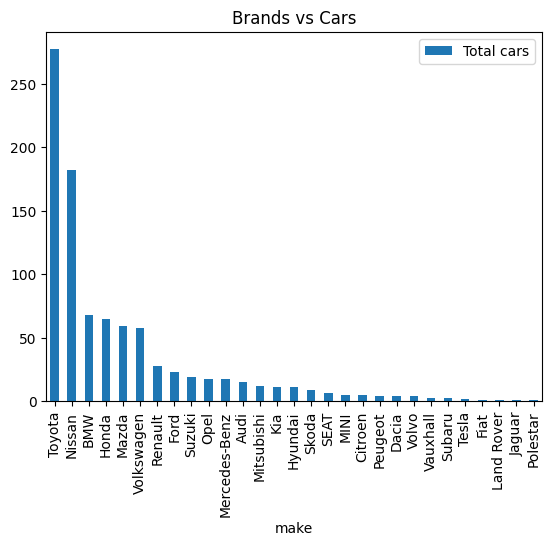

In [ ]:
brands = pd.DataFrame(df['make'].value_counts().reset_index())
brands.columns = ['make', 'Total cars']
brands.plot(x='make', y='Total cars', kind='bar', title='Brands vs Cars')

In [ ]:
!pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 76.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 77.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=513a3ba60e6cf3d851956f3546e5baee0677e74291b7fc

In [ ]:
from pandas_profiling import ProfileReport as pp
pp(result2)

<ipython-input-20-82d92e4b6ea5>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport as pp


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from pandas_profiling import ProfileReport as pp
pp(result3)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from pandas_profiling import ProfileReport as pp
pp(result4)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]